<a href="https://colab.research.google.com/github/Pythonimeislabor/repo1/blob/main/Verbesserungen_am_neuronalen_Netz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz von kaggle herunterladen

In [1]:
%%writefile kaggle.json
{"username":"lutze3","key":"c1b954a36f5402b976973271cb154a2f"}

Writing kaggle.json


In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!kaggle datasets download -d jcprogjava/handwritten-digits-dataset-not-in-mnist
!unzip handwritten-digits-dataset-not-in-mnist.zip

from IPython.display import clear_output
clear_output()

# imports

In [3]:
import cv2 # Bildbearbeitung
import matplotlib.pyplot as plt # Bilder anzeigen
import os # Um Bilder in den Ordnern zu finden
import numpy as np # Für Arrays mit denen Tensorflow umgehen kann
import tensorflow as tf # für deep-learning / neuronale Netze
from tqdm.notebook import tqdm # für hübsche ladebalken

# Testweise ein Bild laden und anzeigen

Die Bilder sind im RGBA-format gespeichert. Die RGB-Farben sind alle auf 0 gesetzt. Der Alpha-Wert speichert in diesem Fall die Helligkeit eines Pixels.<br>
Um ein Bild im RGBA-Format zu laden muss das IMREAD_UNCHANGED an imread() übergeben werden. Ohne IMREAD_UNCHANGED würde opencv nur RGB lesen und den wichtigen Alpha-Wert weglassen

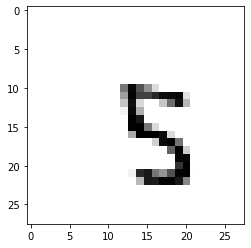

In [4]:
dateipfad = "dataset/5/5/0.png"
bild = cv2.imread(dateipfad, cv2.IMREAD_UNCHANGED) # bild lesen
plt.imshow(bild)

Das Bild hat 3 Dimensionen: Höhe, Breite und die 4 Farbwerte.<br> Mit bild[0] würden wir die erste Zeile im Bild erhalten. Mit Bild[0][0] oder bild[0,0] würden wir den ersten Pixel oben links im Bild erhalten.<br>
bild[ : , : , 3] bedeutet, die Pixel mit Y von Anfang bis Ende, X von Anfang bis Ende, Farbkanal an der Stelle 3

In [5]:
bild[0, 0] # Der Pixel mit y = 0 und x = 0

array([0, 0, 0, 0], dtype=uint8)

In [6]:
bild[0, 0:2] # Die Pixel mit y = 0 und x = 0 bis 2, also X = 1 oder x = 2

array([[0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

(28, 28)


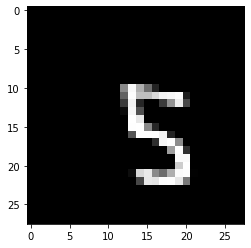

In [7]:
bild_in_grau = bild[:,:,3] # Y von Anfang bis Ende, X von Anfang bis Ende, c nur mit dem Index 3
print(bild_in_grau.shape)
plt.imshow(bild_in_grau, cmap="gray")

Das Bild ist im UINT8-Format gespeichert. Jeder Pixel besteht nun aus 8 Bits, kann also Werte von 0 bis 255 annehmen. Für das neuronale Netz sollten wir diese Werte zwischen 0 und 1 bringen

Das Bild hat den Speichertyp uint8
Das Bild hat nach dem skalieren den Speichertyp float64


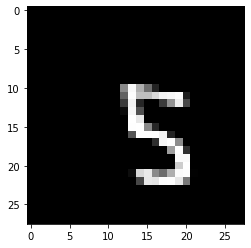

In [8]:
print("Das Bild hat den Speichertyp", bild_in_grau.dtype)
bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren - jeder Wert im array wird durch 255 geteilt
plt.imshow(bild_0_1, cmap = "gray") # Das Bild hat sich nicht verändert, aber das speicherformat ist nun vom type float
print("Das Bild hat nach dem skalieren den Speichertyp", bild_0_1.dtype)

Das Bild muss etwas verunstaltet werden um es dem Netzwerk schwieriger zu machen. Es wird auf sehr schwer zu erkennenden Bildern trainiert um dann normale Bilder zu klassifizieren

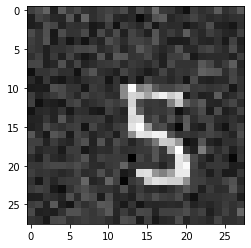

In [9]:
rauschen = np.random.normal(size = (28,28)) / 10
bild_und_rauschen = rauschen + bild_0_1
plt.imshow(bild_und_rauschen, cmap = "gray")

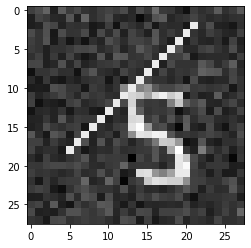

In [10]:
p1_x = np.random.randint(0,29)
p2_x = np.random.randint(0,29)
p1_y = np.random.randint(0,29)
p2_y = np.random.randint(0,29)

bild_mit_linie = cv2.line(bild_und_rauschen.copy(), (p1_x,p1_y), (p2_x,p2_y), (1))
plt.imshow(bild_mit_linie, cmap="gray")

# Trainingsdatensatz generieren
Ein neuronales Netz braucht viele Trainingsdaten um Zusammenhänge zu erkennen.<br>
Dazu werden 2 Listen erstellt. Liste X enthält alle Bilder, Liste Y die zugehörigen Zahlen

In [11]:
os.listdir("dataset") # os.listdir gibt eine liste mit allen Ordnern und Dateien im angegebenen Verzeichnis zurück

['9', '2', '0', '3', '5', '1', '7', '8', '6', '4']

In [12]:
#X = [bild1, bild2, bild3]
#Y = [Beschriftung1, Beschriftung2, Beschriftung3]

X = []
Y = []

def lade_bild(pfad): # Bild laden und vorverarbeiten
  bild = cv2.imread(pfad, cv2.IMREAD_UNCHANGED) # bild lesen vom rgba-format

  bild_in_grau = bild[:,:,3] # Alpha-Wert herausfiltern

  bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren

  rauschen = np.random.normal(size = (28,28)) / 10 # rauschen hinzufügen
  bild_und_rauschen = rauschen + bild_0_1
  
  p1_x = np.random.randint(0,29) # eine verunstaltende linie hinzufügen
  p2_x = np.random.randint(0,29)
  p1_y = np.random.randint(0,29)
  p2_y = np.random.randint(0,29)
  bild_mit_linie = cv2.line(bild_und_rauschen.copy(), (p1_x,p1_y), (p2_x,p2_y), (1))

  return bild_mit_linie # Bild an den Aufruf zurückgeben


for zahl in tqdm(range(10)): # Wir haben ordner von 0 bis 9
  pfad = "dataset/"+str(zahl)+"/"+str(zahl) + "/" # Pfad zusammenbauen
  print("zahl ist", zahl, "- Der Pfad ist", pfad)
  alle_bilder_namen = os.listdir(pfad) # alle bilder im pfad auflisten
  for name in alle_bilder_namen: # alle bilder in dem Ordner durchgehen
    pfad_zum_bild = pfad + name 
    bild = lade_bild(pfad_zum_bild)

    X.append(bild) # Das Bild an X anhängen
    Y.append(zahl) # Die zugehörige Zahl an Y anhängen

  0%|          | 0/10 [00:00<?, ?it/s]

zahl ist 0 - Der Pfad ist dataset/0/0/
zahl ist 1 - Der Pfad ist dataset/1/1/
zahl ist 2 - Der Pfad ist dataset/2/2/
zahl ist 3 - Der Pfad ist dataset/3/3/
zahl ist 4 - Der Pfad ist dataset/4/4/
zahl ist 5 - Der Pfad ist dataset/5/5/
zahl ist 6 - Der Pfad ist dataset/6/6/
zahl ist 7 - Der Pfad ist dataset/7/7/
zahl ist 8 - Der Pfad ist dataset/8/8/
zahl ist 9 - Der Pfad ist dataset/9/9/


In [13]:
print("Es gibt", len(Y),"Trainingsbilder")

Es gibt 107730 Trainingsbilder


Es wird das Bild mit dem index 50000 angezeigt
Y ist  4


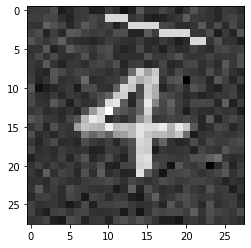

In [14]:
index = 50000

print("Es wird das Bild mit dem index", index, "angezeigt")
plt.imshow(X[index], cmap = "gray"), 
print("Y ist ", Y[index])

In [15]:
# listen in numpy arrays umwandeln
Y = np.array(Y) # numpy arrays sind für viele Elemente eine bessere Speichermethode
X = np.array(X) # tensorflow benötigt numpy arrays und kann nicht mit listen arbeiten

für das Training werden die Trainingsdaten in Trainingsdaten und Validierungsdaten aufgeteilt. Das neuronale Netz wird auf 80% der Daten trainiert und auf die anderen 20% getestet. Wenn es auf den anderen 20% gut ist, hat das neuronale Netz das Konzept von den Bildern verstanden. wenn es nur auf den Trainingsdaten gut ist und die Testdaten nicht klassifizieren kann, hat es nicht gut gelernt. <br>Tensorflow nimmt immer die letzten x% im Datensatz als Validierungsdaten. In diesem Fall sind die letzten 20% alle Bilder der 8 und der 9. Es würde also von 0 - 7 alles lernen und auf 8 und 9 getestet werden. Das kann so nicht funktionieren, denn wenn das Netzwerk nie eine 8 oder 9 in den Trainingsdaten gesehen hat wird es lernen dass es solche Zahlen nicht gibt. Also müssen die Trainingsdaten gemischt werden um zufällige Zahlen als Validierungsdaten zu erhalten

In [16]:
# X und Y gleichmäßig mischen
# X und Y werden so gemischt, dass Y[index] die Zahl enthält die in X[index] gespeichert ist
p = np.random.permutation(Y.shape[0]) 
X = X[p]
Y = Y[p] 

# Neuronales Netzwerk bauen und trainieren

In [38]:
inputlayer = tf.keras.layers.Input(shape=(28,28)) # unser Bild hat die Form [Höhe, Breite]
print("input hat die Form", inputlayer.shape)
reshape_28_28_1 = tf.keras.layers.Reshape((28,28,1))(inputlayer) # Bilder werden in der Form [Höhe, Breite, Farbwerte] gespeichert
print("nach Reshape() ist die Form", inputlayer.shape)

random_rotation = tf.keras.layers.RandomRotation((-0.1, 0.1))(reshape_28_28_1)
random_verschieben = tf.keras.layers.RandomTranslation((-0.1,0.1),(-0.1,0.1))(random_rotation)

x = tf.keras.layers.Conv2D(8,3,activation="relu")(random_verschieben)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Conv2D(16,3,activation="relu")(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)

platt = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32,activation="relu")(platt)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(16,activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(10,activation="softmax")(x)

model = tf.keras.Model(inputlayer, output)
print("")
model.summary()

input hat die Form (None, 28, 28)
nach Reshape() ist die Form (None, 28, 28)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_4 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 random_rotation_4 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 random_translation_4 (Rando  (None, 28, 28, 1)        0         
 mTranslation)                                                   
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 8)         80        
                                               

In [39]:
fehlerfunktion = tf.keras.losses.SparseCategoricalCrossentropy()
optimierer = tf.keras.optimizers.SGD(0.001, momentum = 0.95)
model.compile(optimierer, fehlerfunktion, metrics="accuracy")

In [42]:
model.fit(X, Y, batch_size = 64, epochs = 100, validation_split = 0.2) # Parameter optimieren

Epoch 1/100
1347/1347 [==============================] - 11s 8ms/step - loss: 1.3699 - accuracy: 0.5274 - val_loss: 1.2440 - val_accuracy: 0.6347
Epoch 2/100
1347/1347 [==============================] - 11s 8ms/step - loss: 1.3682 - accuracy: 0.5308 - val_loss: 1.2928 - val_accuracy: 0.6153
Epoch 3/100
1347/1347 [==============================] - 10s 7ms/step - loss: 1.3766 - accuracy: 0.5272 - val_loss: 1.2853 - val_accuracy: 0.6290
Epoch 4/100
1347/1347 [==============================] - 10s 8ms/step - loss: 1.3737 - accuracy: 0.5303 - val_loss: 1.3200 - val_accuracy: 0.6104
Epoch 5/100
1347/1347 [==============================] - 10s 7ms/step - loss: 1.3689 - accuracy: 0.5307 - val_loss: 1.2387 - val_accuracy: 0.6344
Epoch 6/100
1347/1347 [==============================] - 10s 7ms/step - loss: 1.3696 - accuracy: 0.5318 - val_loss: 1.3231 - val_accuracy: 0.6074
Epoch 7/100
1347/1347 [==============================] - 10s 7ms/step - loss: 1.3700 - accuracy: 0.5320 - val_loss: 1.2188 -

In [41]:
model.save("model.h5") # Netzwerk und Parameter speichern

# Test mit selbstgemaltem Bild
Male eine Zahl mit Paint und lade das Bild in das Colab notebook.

In [21]:
bild = cv2.imread("Untitled.png", cv2.IMREAD_GRAYSCALE) # bild mit dem Namen untitled.png lesen im graustufen-format
bild = cv2.resize(bild, (28,28))
#bild = cv2.blur(bild,(2,2))
bild_0_1 = 1 - bild / 255 # bild zwischen 0 und 1 skalieren
plt.imshow(bild_0_1, cmap = "gray")
bild_0_1.shape

error: ignored

In [ ]:
bild_batch = np.reshape(bild_0_1,(1,28,28)) # tensorflow braucht ein array von Inputs

entscheidungen = model(bild_batch)
print("Die Entscheidungen sind:", entscheidungen)
print("Das ist die Zahl:", np.argmax(entscheidungen))